# **The Sparks Foundation || GRIP_MAY-21**


---


### **Data Science and Business Analytics**

**TASK 5 - Exploratory Data Analysis - Sports**

**Author : SATHISH PRASAD A**

---


● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’.

● As a sports analysts, find out the most successful teams, players and factors 
contributing win or loss of a team. 

● Suggest teams or players a company should endorse for its products. 


# **Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing the dataset**

In [ ]:
data=pd.read_csv('A:/college/PG/2ND SEM/INTERNSHIPS/Task5/matches.csv')

In [ ]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# **Handling Missing Values**

In [ ]:
#We can drop column called umpire3.
data_final=data.drop(['umpire3'],axis=1)

# **Replacing the missing Values**

In [ ]:
#Replacing the missing values with the most frequent values present in each column
final_data=data_final.fillna(data.mode().iloc[0])

In [ ]:
final_data.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

# **Finding the Maximum winning Team**

In [ ]:
final_data['winner'].value_counts().idxmax()

'Mumbai Indians'

# **Finding the Minimum winning Team**

In [ ]:
final_data['winner'].value_counts().idxmin()

'Rising Pune Supergiants'

In [ ]:
final_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
teams_per_season = final_data.groupby('season')['winner'].value_counts()
teams_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

# **Exploring the Datas of 2010**

In [ ]:
year = 2010
win_per_season_data = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_data = win_per_season_data.append(win_series)

((2010, 'Mumbai Indians'), 11)
((2010, 'Chennai Super Kings'), 9)
((2010, 'Deccan Chargers'), 8)
((2010, 'Royal Challengers Bangalore'), 8)
((2010, 'Delhi Daredevils'), 7)
((2010, 'Kolkata Knight Riders'), 7)
((2010, 'Rajasthan Royals'), 6)
((2010, 'Kings XI Punjab'), 4)


<AxesSubplot:ylabel='city'>

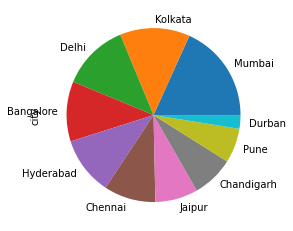

In [ ]:
final_data['city'].value_counts().head(10).plot.pie()

In [ ]:
winner_per_city =final_data.groupby('city')['winner'].value_counts()
winner_per_city

city           winner                 
Abu Dhabi      Rajasthan Royals           3
               Kings XI Punjab            2
               Chennai Super Kings        1
               Kolkata Knight Riders      1
Ahmedabad      Rajasthan Royals           7
                                         ..
Visakhapatnam  Rising Pune Supergiants    2
               Delhi Capitals             1
               Delhi Daredevils           1
               Kings XI Punjab            1
               Rajasthan Royals           1
Name: winner, Length: 211, dtype: int64

# **Venues of the Matches held in the Year 2010**

In [ ]:
venue_ser = final_data['venue'].value_counts()

In [ ]:
venue_ser

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [ ]:
venue_data = pd.DataFrame(columns=[ 'matches','venue'])
for items in venue_ser.iteritems():
    temp_data = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_data = venue_data.append(temp_data, ignore_index=True)

In [ ]:
venue_data

,matches,venue
0,77,Eden Gardens
1,73,Wankhede Stadium
2,73,M Chinnaswamy Stadium
3,67,Feroz Shah Kotla
4,56,"Rajiv Gandhi International Stadium, Uppal"
5,49,"MA Chidambaram Stadium, Chepauk"
6,47,Sawai Mansingh Stadium
7,35,"Punjab Cricket Association Stadium, Mohali"
8,21,Maharashtra Cricket Association Stadium
9,17,Subrata Roy Sahara Stadium


In [ ]:
team_wins_ser = final_data['winner'].value_counts()

team_wins_data = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_data1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_data = team_wins_data.append(temp_data1, ignore_index=True)

In [ ]:
team_wins_data

,team,wins
0,Mumbai Indians,113
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


# **Exploring the player of the Match**

In [ ]:
mvp_ser = final_data['player_of_match'].value_counts()

mvp_ten_data = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_data2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_data = mvp_ten_data.append(temp_data2, ignore_index=True)
        count += 1


In [ ]:
mvp_ten_data

,player,wins
0,CH Gayle,25
1,AB de Villiers,20
2,DA Warner,17
3,RG Sharma,17
4,MS Dhoni,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


In [ ]:
toss_ser = final_data['toss_winner'].value_counts()

toss_data = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_data = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_data = toss_data.append(temp_data, ignore_index=True)

In [ ]:
toss_data

,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Kings XI Punjab,81
4,Royal Challengers Bangalore,81
5,Rajasthan Royals,80
6,Delhi Daredevils,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


In [ ]:
win_count = 0
for index, value in final_data.iterrows():
    if(value['toss_winner']==value['winner']):
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(final_data)
print('The probability of winning if won the toss: {:.2f}' .format(prob))

The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


# **Importing the Datasets**

In [ ]:
#importing the dataset
deliveries=pd.read_csv('A:/college/PG/2ND SEM/INTERNSHIPS/Task5/deliveries.csv')

In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
deliveries['is_super_over'].value_counts()

0    178997
1        81
Name: is_super_over, dtype: int64

In [ ]:
sum(deliveries['extra_runs'])

12004

In [ ]:
sum(deliveries['noball_runs'])

749

In [ ]:
sum(deliveries['penalty_runs'])

10

In [ ]:
sum(deliveries['player_dismissed'].value_counts())

8834

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'caught'),
  Text(1, 0, 'bowled'),
  Text(2, 0, 'run out'),
  Text(3, 0, 'lbw'),
  Text(4, 0, 'caught and bowled'),
  Text(5, 0, 'stumped'),
  Text(6, 0, 'retired hurt'),
  Text(7, 0, 'hit wicket'),
  Text(8, 0, 'obstructing the field')])

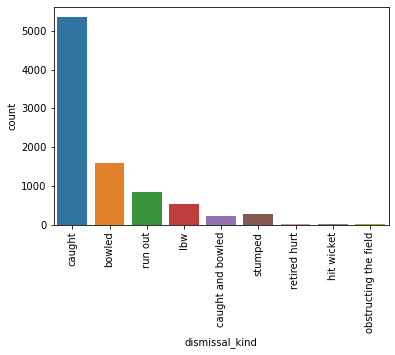

In [ ]:
sns.countplot(x = deliveries['dismissal_kind'], data = deliveries)
plt.xticks(rotation = 90)